In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import math

td=pd.read_csv("train.csv")
td

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Dataset Overview

The dataset consists of **891 rows** and **12 columns**. It appears to be the **Titanic survival dataset**, commonly used for classification problems in data science.

Total number of rows - **891**

### Column-wise Description

| Column       | Type     | Description |
|--------------|----------|-------------|
| `PassengerId`| `int64`  | Unique identifier for each passenger |
| `Survived`   | `int64`  | Survival status (0 = No, 1 = Yes) — **Target variable** |
| `Pclass`     | `int64`  | Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd) |
| `Name`       | `object` | Full name of the passenger |
| `Sex`        | `object` | Gender (`male` or `female`) |
| `Age`        | `float64`| Age in years (missing values present) |
| `SibSp`      | `int64`  | # of siblings/spouses aboard |
| `Parch`      | `int64`  | # of parents/children aboard |
| `Ticket`     | `object` | Ticket number |
| `Fare`       | `float64`| Passenger fare |
| `Cabin`      | `object` | Cabin number (lots of missing values) |
| `Embarked`   | `object` | Port of Embarkation (`C` = Cherbourg, `Q` = Queenstown, `S` = Southampton) |

### Summary Statistics

- **Missing Data**:
  - `Age`: 714 non-null → ~20% missing
  - `Cabin`: 204 non-null → ~77% missing
  - `Embarked`: 889 non-null → 2 missing

- **Survival Rate**: ~38.4% of passengers survived.

- **Fare**: Ranges from 0 to 512.33 with a **mean** of ~32.2 and a **median** of ~14.45.

- **Age**: Ranges from 0.42 to 80 years with a **mean** of ~29.7 years.

- **Class Distribution (`Pclass`)**:
  - Class 1: More expensive and luxurious
  - Class 3: Most common and cheaper tickets


In [4]:
td.shape

(891, 12)

In [5]:
td.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:

a = td[td["Survived"] == 1]
a1 = a[a["Pclass"] == 1]
print(a1['Age'].median()) 

b = td[td["Survived"] == 0]
b1 = b[b["Pclass"] == 1]
print(b1['Age'].median())

c = td[td["Survived"] == 1]
c1 = c[c["Pclass"] == 2]
print(c1['Age'].median())

d = td[td["Survived"] == 0]
d1 = d[d["Pclass"] == 2]
print(d1['Age'].median())

e = td[td["Survived"] == 1]
e1 = e[e["Pclass"] == 3]
print(e1['Age'].median())

f = td[td["Survived"] == 0]
f1 = f[f["Pclass"] == 3]
print(f1['Age'].median())


a = td[td["Survived"] == 1]
a1 = a[a["Pclass"] == 1]
print(a1['Embarked'].mode()[0])  

b = td[td["Survived"] == 0]
b1 = b[b["Pclass"] == 1]
print(b1['Embarked'].mode()[0])

c = td[td["Survived"] == 1]
c1 = c[c["Pclass"] == 2]
print(c1['Embarked'].mode()[0])

d = td[td["Survived"] == 0]
d1 = d[d["Pclass"] == 2]
print(d1['Embarked'].mode()[0])

e = td[td["Survived"] == 1]
e1 = e[e["Pclass"] == 3]
print(e1['Embarked'].mode()[0])

f = td[td["Survived"] == 0]
f1 = f[f["Pclass"] == 3]
print(f1['Embarked'].mode()[0])


35.0
45.25
28.0
30.5
22.0
25.0
S
S
S
S
S
S


In [7]:
td.loc[(td["Survived"] == 1) & (td["Pclass"]==1)&(td["Age"].isna()) , "Age"] = td["Age"].fillna(35.0)
td.loc[(td["Survived"] == 1) & (td["Pclass"]==2)&(td["Age"].isna()) , "Age"] = td["Age"].fillna(28.0)
td.loc[(td["Survived"] == 1) & (td["Pclass"]==3)&(td["Age"].isna()) , "Age"] = td["Age"].fillna(22.0)

td.loc[(td["Survived"] == 0) & (td["Pclass"]==1)&(td["Age"].isna()) , "Age"] = td["Age"].fillna(45.25)
td.loc[(td["Survived"] == 0) & (td["Pclass"]==2)&(td["Age"].isna()) , "Age"] = td["Age"].fillna(30.5)
td.loc[(td["Survived"] == 0) & (td["Pclass"]==3)&(td["Age"].isna()) , "Age"] = td["Age"].fillna(25.0)

td.loc[(td["Survived"] == 1) & (td["Pclass"]==1)&(td["Cabin"].isna()) , "Cabin"] = td["Cabin"].fillna("B96")
td.loc[(td["Survived"] == 1) & (td["Pclass"]==2)&(td["Cabin"].isna()) , "Cabin"] = td["Cabin"].fillna("E101")
td.loc[(td["Survived"] == 1) & (td["Pclass"]==3)&(td["Cabin"].isna()) , "Cabin"] = td["Cabin"].fillna("E121")

td.loc[(td["Survived"] == 0) & (td["Pclass"]==1)&(td["Cabin"].isna()) , "Cabin"] = td["Cabin"].fillna("C124")
td.loc[(td["Survived"] == 0) & (td["Pclass"]==2)&(td["Cabin"].isna()) , "Cabin"] = td["Cabin"].fillna("D")
td.loc[(td["Survived"] == 0) & (td["Pclass"]==3)&(td["Cabin"].isna()) , "Cabin"] = td["Cabin"].fillna("F")
td.Embarked.fillna("S")

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [8]:
td.dropna(inplace=True)

In [9]:
td.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [10]:
td.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        889 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


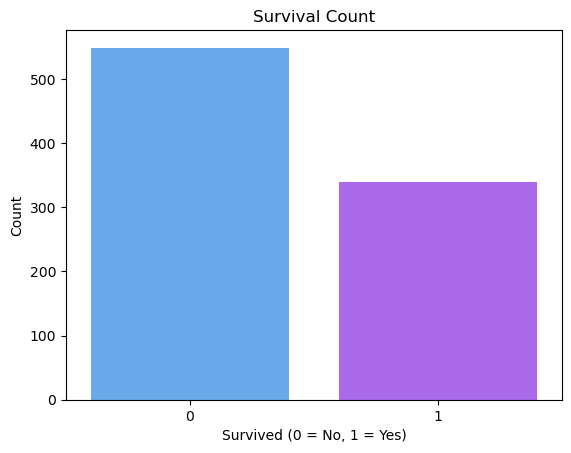

In [100]:
sns.countplot(data=td, x="Survived", palette="cool")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.title("Survival Count")
plt.show()


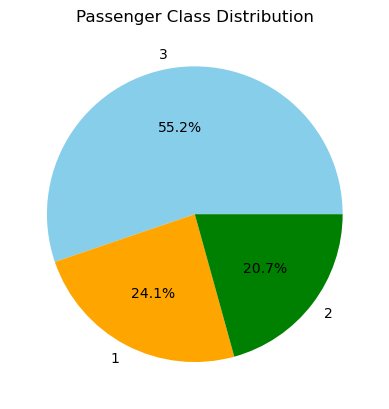

In [12]:
td["Pclass"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=["skyblue", "orange", "green"])
plt.title("Passenger Class Distribution")
plt.ylabel("")
plt.show()


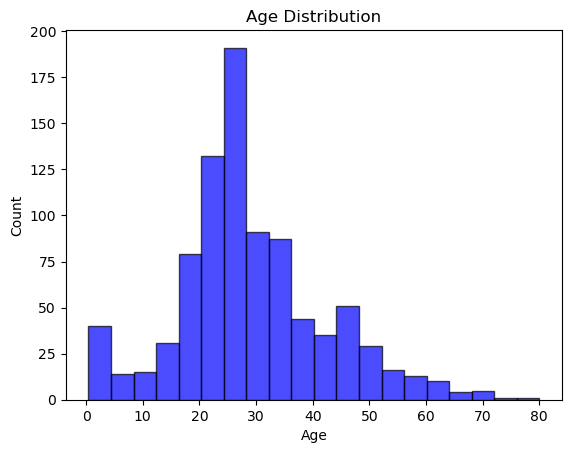

In [13]:
plt.hist(td["Age"].dropna(), bins=20, color="blue", edgecolor="black", alpha=0.7)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution")
plt.show()


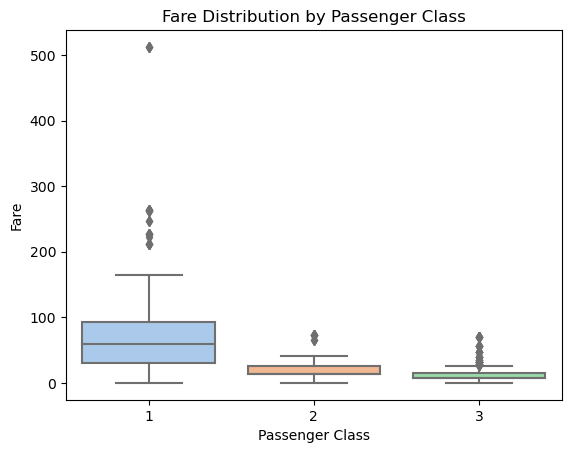

In [14]:
sns.boxplot(data=td, x="Pclass", y="Fare", palette="pastel")
plt.xlabel("Passenger Class")
plt.ylabel("Fare")
plt.title("Fare Distribution by Passenger Class")
plt.show()


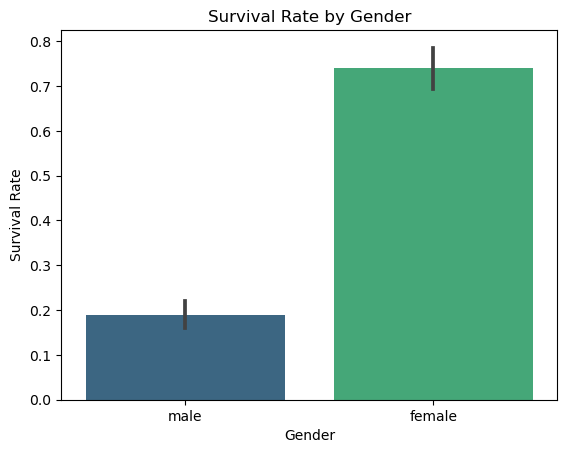

In [15]:
sns.barplot(data=td, x="Sex", y="Survived", palette="viridis")
plt.xlabel("Gender")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Gender")
plt.show()


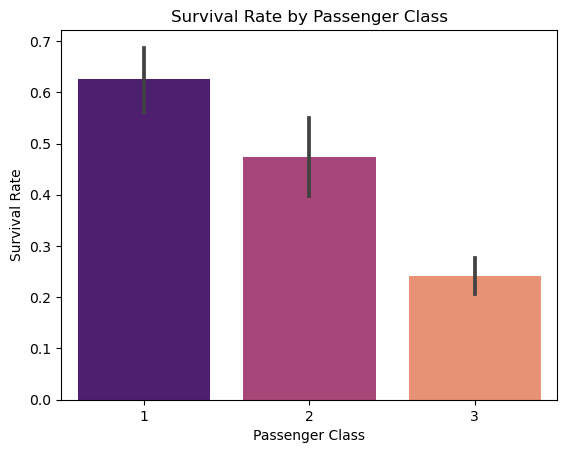

In [16]:
sns.barplot(data=td, x="Pclass", y="Survived", palette="magma")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Passenger Class")
plt.show()


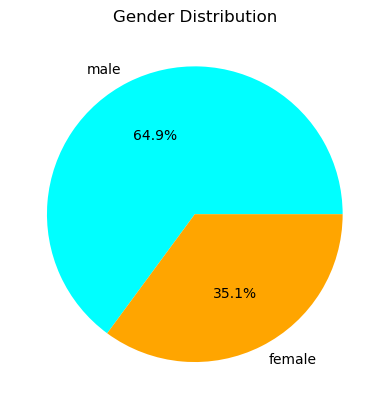

In [17]:
td["Sex"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=["aqua", "orange"])
plt.title("Gender Distribution")
plt.ylabel("")
plt.show()


C:\Users\subha\AppData\Local\Temp\ipykernel_10516\1609773449.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(td[td["Survived"] == 1]["Age"].dropna(), label="Survived", shade=True, color="green")
C:\Users\subha\AppData\Local\Temp\ipykernel_10516\1609773449.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(td[td["Survived"] == 0]["Age"].dropna(), label="Not Survived", shade=True, color="red")


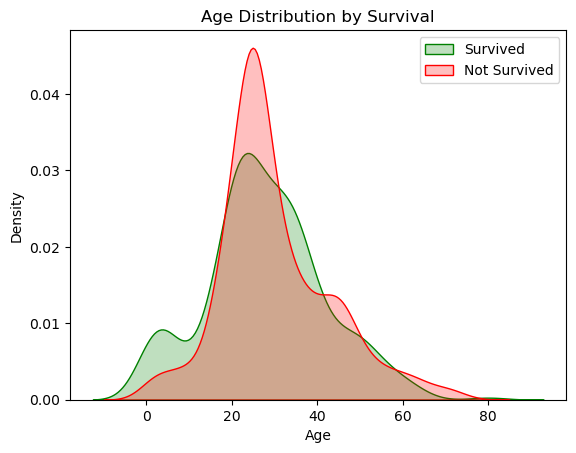

In [18]:
sns.kdeplot(td[td["Survived"] == 1]["Age"].dropna(), label="Survived", shade=True, color="green")
sns.kdeplot(td[td["Survived"] == 0]["Age"].dropna(), label="Not Survived", shade=True, color="red")
plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Age Distribution by Survival")
plt.legend()
plt.show()


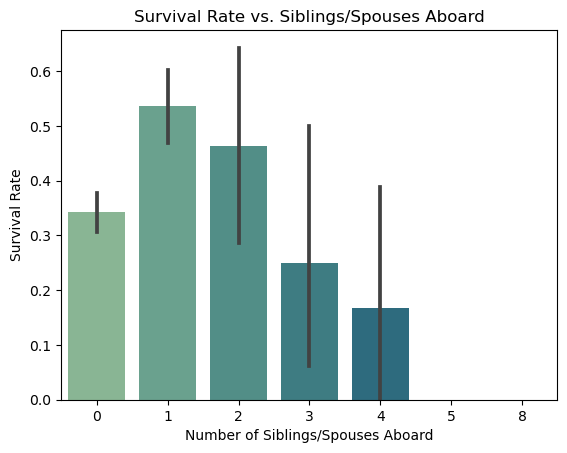

In [19]:
sns.barplot(data=td, x="SibSp", y="Survived", palette="crest")
plt.xlabel("Number of Siblings/Spouses Aboard")
plt.ylabel("Survival Rate")
plt.title("Survival Rate vs. Siblings/Spouses Aboard")
plt.show()


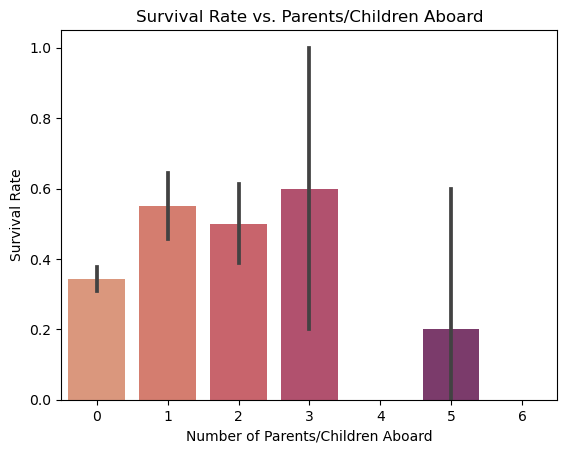

In [20]:
sns.barplot(data=td, x="Parch", y="Survived", palette="flare")
plt.xlabel("Number of Parents/Children Aboard")
plt.ylabel("Survival Rate")
plt.title("Survival Rate vs. Parents/Children Aboard")
plt.show()


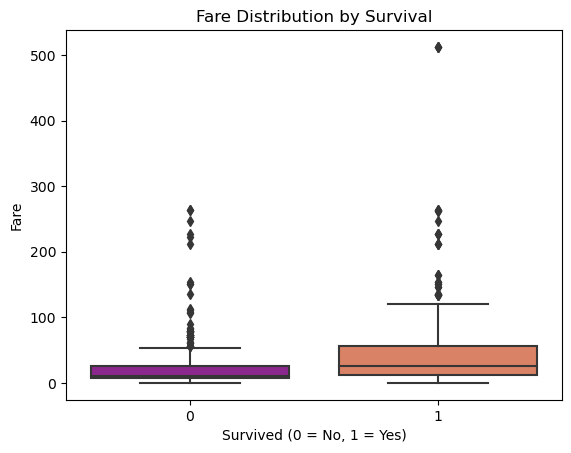

In [21]:
sns.boxplot(data=td, x="Survived", y="Fare", palette="plasma")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Fare")
plt.title("Fare Distribution by Survival")
plt.show()


In [22]:
print(td['Sex'])

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 889, dtype: object


In [23]:
sex=pd.get_dummies(td['Sex'],drop_first=True)
print(sex)

     male
0       1
1       0
2       0
3       0
4       1
..    ...
886     1
887     0
888     0
889     1
890     1

[889 rows x 1 columns]


In [24]:
print(td['Embarked'])

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 889, dtype: object


In [25]:
emb=pd.get_dummies(td['Embarked'],drop_first=True)
print(emb)

     Q  S
0    0  1
1    0  0
2    0  1
3    0  1
4    0  1
..  .. ..
886  0  1
887  0  1
888  0  1
889  0  0
890  1  0

[889 rows x 2 columns]


In [26]:
print(td['Pclass'])

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 889, dtype: int64


In [27]:
pcls=pd.get_dummies(td['Pclass'],drop_first=True)
print(pcls)

     2  3
0    0  1
1    0  0
2    0  1
3    0  0
4    0  1
..  .. ..
886  1  0
887  0  0
888  0  1
889  0  0
890  0  1

[889 rows x 2 columns]


In [28]:
print(td['Cabin'])

0         F
1       C85
2      E121
3      C123
4         F
       ... 
886       D
887     B42
888       F
889    C148
890       F
Name: Cabin, Length: 889, dtype: object


In [29]:
cab=pd.get_dummies(td['Cabin'],prefix="Cabin")
print(cab)

     Cabin_A10  Cabin_A14  Cabin_A16  Cabin_A19  Cabin_A20  Cabin_A23  \
0            0          0          0          0          0          0   
1            0          0          0          0          0          0   
2            0          0          0          0          0          0   
3            0          0          0          0          0          0   
4            0          0          0          0          0          0   
..         ...        ...        ...        ...        ...        ...   
886          0          0          0          0          0          0   
887          0          0          0          0          0          0   
888          0          0          0          0          0          0   
889          0          0          0          0          0          0   
890          0          0          0          0          0          0   

     Cabin_A24  Cabin_A26  Cabin_A31  Cabin_A32  ...  Cabin_F  Cabin_F E69  \
0            0          0          0         

In [30]:
# td.loc[(td["Survived"] == 1) & (td["Pclass"]==1)&(td["Age"].isna()) , "Age"] = td["Age"].fillna(35.0)
# td.loc[(td["Survived"] == 1) & (td["Pclass"]==2)&(td["Age"].isna()) , "Age"] = td["Age"].fillna(28.0)
# td.loc[(td["Survived"] == 1) & (td["Pclass"]==3)&(td["Age"].isna()) , "Age"] = td["Age"].fillna(22.0)

# td.loc[(td["Survived"] == 0) & (td["Pclass"]==1)&(td["Age"].isna()) , "Age"] = td["Age"].fillna(45.25)
# td.loc[(td["Survived"] == 0) & (td["Pclass"]==2)&(td["Age"].isna()) , "Age"] = td["Age"].fillna(30.5)
# td.loc[(td["Survived"] == 0) & (td["Pclass"]==3)&(td["Age"].isna()) , "Age"] = td["Age"].fillna(25.0)

# td.loc[(td["Survived"] == 1) & (td["Pclass"]==1)&(td["Cabin"].isna()) , "Cabin"] = td["Cabin"].fillna("B96")
# td.loc[(td["Survived"] == 1) & (td["Pclass"]==2)&(td["Cabin"].isna()) , "Cabin"] = td["Cabin"].fillna("E101")
# td.loc[(td["Survived"] == 1) & (td["Pclass"]==3)&(td["Cabin"].isna()) , "Cabin"] = td["Cabin"].fillna("E121")

# td.loc[(td["Survived"] == 0) & (td["Pclass"]==1)&(td["Cabin"].isna()) , "Cabin"] = td["Cabin"].fillna("C124")
# td.loc[(td["Survived"] == 0) & (td["Pclass"]==2)&(td["Cabin"].isna()) , "Cabin"] = td["Cabin"].fillna("D")
# td.loc[(td["Survived"] == 0) & (td["Pclass"]==3)&(td["Cabin"].isna()) , "Cabin"] = td["Cabin"].fillna("F")
# td.Embarked.fillna("S")

In [31]:
td.drop(["Pclass","Sex","Embarked"],axis=1,inplace=True)

In [32]:
td=pd.concat([td,sex,emb,pcls,cab],axis=1)

In [33]:
print(td.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Columns: 162 entries, PassengerId to Cabin_T
dtypes: float64(2), int64(4), object(3), uint8(153)
memory usage: 202.3+ KB
None


In [34]:
td.drop(["Name","PassengerId","Ticket","Cabin"],axis=1,inplace=True)

In [35]:
td.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Columns: 158 entries, Survived to Cabin_T
dtypes: float64(2), int64(3), uint8(153)
memory usage: 174.5 KB


In [36]:
X=td.drop(["Survived"],axis=1)
print(X)

      Age  SibSp  Parch     Fare  male  Q  S  2  3  Cabin_A10  ...  Cabin_F  \
0    22.0      1      0   7.2500     1  0  1  0  1          0  ...        1   
1    38.0      1      0  71.2833     0  0  0  0  0          0  ...        0   
2    26.0      0      0   7.9250     0  0  1  0  1          0  ...        0   
3    35.0      1      0  53.1000     0  0  1  0  0          0  ...        0   
4    35.0      0      0   8.0500     1  0  1  0  1          0  ...        1   
..    ...    ...    ...      ...   ... .. .. .. ..        ...  ...      ...   
886  27.0      0      0  13.0000     1  0  1  1  0          0  ...        0   
887  19.0      0      0  30.0000     0  0  1  0  0          0  ...        0   
888  25.0      1      2  23.4500     0  0  1  0  1          0  ...        1   
889  26.0      0      0  30.0000     1  0  0  0  0          0  ...        0   
890  32.0      0      0   7.7500     1  1  0  0  1          0  ...        1   

     Cabin_F E69  Cabin_F G63  Cabin_F G73  Cabin_F

In [37]:
X.columns=X.columns.astype(str)

In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Columns: 157 entries, Age to Cabin_T
dtypes: float64(2), int64(2), uint8(153)
memory usage: 167.6 KB


In [39]:
y=td["Survived"]
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

In [42]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 666 entries, 747 to 37
Columns: 157 entries, Age to Cabin_T
dtypes: float64(2), int64(2), uint8(153)
memory usage: 125.5 KB


In [43]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223 entries, 387 to 292
Columns: 157 entries, Age to Cabin_T
dtypes: float64(2), int64(2), uint8(153)
memory usage: 42.0 KB


In [44]:
lm=LogisticRegression(max_iter=10000)

In [45]:
print(lm.fit(X_train,y_train))

LogisticRegression(max_iter=10000)


In [46]:
Predictions=lm.predict(X_test)

In [47]:
print(classification_report(y_test,Predictions))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       138
           1       0.95      0.98      0.97        85

    accuracy                           0.97       223
   macro avg       0.97      0.97      0.97       223
weighted avg       0.97      0.97      0.97       223



In [48]:
print(confusion_matrix(y_test,Predictions))

[[134   4]
 [  2  83]]


In [49]:
print(accuracy_score(y_test,Predictions))

0.9730941704035875


In [50]:
Predictions

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)